In [110]:
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import plotly.express as px

### Read all CSV files into one DataFrame

In [109]:
!pip install plotly.express

     |████████████████████████████████| 27.7 MB 2.0 kB/s eta 0:00:01    |█████                           | 4.3 MB 545 kB/s eta 0:00:43��███▍                          | 4.6 MB 6.1 MB/s eta 0:00:04     |███████▏                        | 6.2 MB 6.1 MB/s eta 0:00:04     |███████▎                        | 6.3 MB 1.0 MB/s eta 0:00:21     |███████▉                        | 6.8 MB 1.0 MB/s eta 0:00:21     |████████                        | 7.0 MB 1.0 MB/s eta 0:00:21     |███████████▊                    | 10.1 MB 2.3 MB/s eta 0:00:08     |█████████████▌                  | 11.7 MB 347 kB/s eta 0:00:46     |██████████████▏                 | 12.2 MB 189 kB/s eta 0:01:22     |██████████████▋                 | 12.6 MB 333 kB/s eta 0:00:46     |██████████████▊                 | 12.7 MB 333 kB/s eta 0:00:45     |███████████████                 | 13.0 MB 333 kB/s eta 0:00:44     |███████████████▌                | 13.4 MB 754 kB/s eta 0:00:19     |███████████████▊                | 13.6 MB 754 kB/s eta 

In [2]:
import glob
path = './Sales_Data'
files = glob.glob(path + '/*.csv')

# create empty list to store dataframes
li = []

# loop through list of files and read each one into a dataframe and append to list
for f in files:
    # read in csv
    temp_df = pd.read_csv(f)
    # append df to list
    li.append(temp_df)
    print(f'Successfully created dataframe for {f} with shape {temp_df.shape}')


# concatenate our list of dataframes into one!
sales = pd.concat(li, axis=0)
print(sales.shape)
sales.head()


Successfully created dataframe for ./Sales_Data/Sales_April_2019.csv with shape (18383, 6)
Successfully created dataframe for ./Sales_Data/Sales_August_2019.csv with shape (12011, 6)
Successfully created dataframe for ./Sales_Data/Sales_December_2019.csv with shape (25117, 6)
Successfully created dataframe for ./Sales_Data/Sales_February_2019.csv with shape (12036, 6)
Successfully created dataframe for ./Sales_Data/Sales_January_2019.csv with shape (9723, 6)
Successfully created dataframe for ./Sales_Data/Sales_July_2019.csv with shape (14371, 6)
Successfully created dataframe for ./Sales_Data/Sales_June_2019.csv with shape (13622, 6)
Successfully created dataframe for ./Sales_Data/Sales_March_2019.csv with shape (15226, 6)
Successfully created dataframe for ./Sales_Data/Sales_May_2019.csv with shape (16635, 6)
Successfully created dataframe for ./Sales_Data/Sales_November_2019.csv with shape (17661, 6)
Successfully created dataframe for ./Sales_Data/Sales_October_2019.csv with shape (

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [3]:
sales.shape

(186850, 6)

In [4]:
sales.sample(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
11691,161678,34in Ultrawide Monitor,1,379.99,02/16/19 21:49,"235 Spruce St, Los Angeles, CA 90001"
8223,201909,Lightning Charging Cable,1,14.95,05/27/19 10:57,"898 North St, Boston, MA 02215"
393,259733,AA Batteries (4-pack),1,3.84,10/30/19 13:29,"786 South St, Dallas, TX 75001"
17653,193404,AA Batteries (4-pack),1,3.84,04/19/19 09:00,"213 West St, San Francisco, CA 94016"
4054,240567,27in FHD Monitor,1,149.99,08/04/19 18:11,"893 2nd St, Portland, OR 97035"
2371,225189,Wired Headphones,1,11.99,07/19/19 15:30,"248 North St, New York City, NY 10001"
10854,220271,Lightning Charging Cable,1,14.95,06/27/19 20:55,"747 Park St, Dallas, TX 75001"
4484,263630,27in FHD Monitor,1,149.99,10/23/19 07:28,"221 Jefferson St, San Francisco, CA 94016"
2513,143619,USB-C Charging Cable,2,11.95,01/16/19 12:58,"791 Park St, New York City, NY 10001"
14880,176224,USB-C Charging Cable,1,11.95,03/15/19 11:10,"592 River St, Atlanta, GA 30301"


In [5]:
sales.duplicated().sum()

1162

In [6]:
#drop duplicated rows b/c they don't have any additional info 
sales.drop_duplicates(inplace= True)

In [10]:
sales.duplicated().sum()

0

In [95]:
#check for null values 
sales['Quantity Ordered'].isna().sum()


2

In [34]:
#change column type to numeric 
sales['Quantity Ordered'] = sales['Quantity Ordered'].apply(pd.to_numeric, errors='coerce')
sales['Price Each'] = sales['Price Each'].apply(pd.to_numeric, errors='coerce')

In [96]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185688 entries, 0 to 11685
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order ID          185687 non-null  object 
 1   Product           185687 non-null  object 
 2   Quantity Ordered  185686 non-null  float64
 3   Price Each        185686 non-null  float64
 4   Order Date        185687 non-null  object 
 5   Purchase Address  185687 non-null  object 
dtypes: float64(2), object(4)
memory usage: 9.9+ MB


In [12]:
#count non duplicate orders (we have duplicated order Id because there might be more than one Product in the same order)
sales['Order ID'].nunique()

178438

In [89]:
#look at the products 'quantity sold' and 'total sales' 
products_quantity = sales.groupby(['Product'], as_index = False).agg(total_sold = ('Quantity Ordered', 'sum'))

products_sales = sales.groupby(['Product'], as_index = False).agg(total_sold = ('Quantity Ordered', 'sum'), price = ('Price Each', 'mean'))
products_sales['total_amount'] =  products_sales['price'] * products_sales['total_sold']

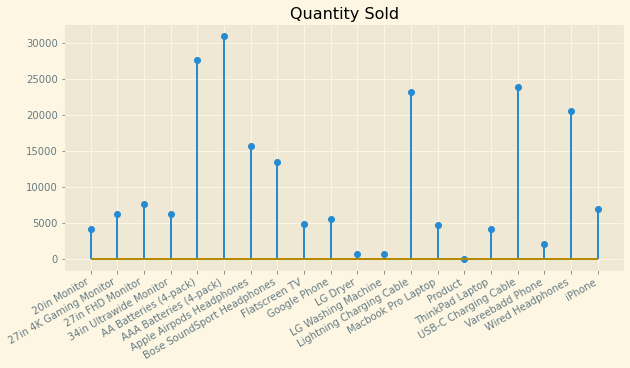

In [86]:
#plot 'Quantity Sold'
plt.style.use('Solarize_Light2')
fig, ax = plt.subplots()

ax.stem(products_quantity['Product'], products_quantity['total_sold'])
fig.autofmt_xdate()
fig.set_size_inches((10,5))
plt.title("Quantity Sold")
plt.show()

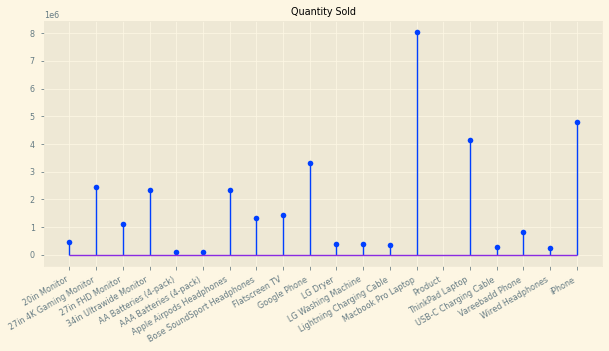

In [98]:
plt.style.use('seaborn-paper')
fig, ax = plt.subplots()

ax.stem(products_sales['Product'], products_sales['total_amount'])
fig.autofmt_xdate()
fig.set_size_inches((10,5))
plt.title("Quantity Sold")
plt.show()

In [ ]:
#check available styles for pyplot
plt.style.available

### Sales by month


In [103]:
#change type for order date 
sales['Order Date'] = sales['Order Date'].apply(pd.to_datetime, errors='coerce')

#extract month from date type 
sales ['Month'] = sales['Order Date'].dt.to_period('M')


In [104]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185688 entries, 0 to 11685
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185687 non-null  object        
 1   Product           185687 non-null  object        
 2   Quantity Ordered  185686 non-null  float64       
 3   Price Each        185686 non-null  float64       
 4   Order Date        185686 non-null  datetime64[ns]
 5   Purchase Address  185687 non-null  object        
 6   Month             185686 non-null  period[M]     
dtypes: datetime64[ns](1), float64(2), object(3), period[M](1)
memory usage: 11.3+ MB


In [125]:
sales_each_month = sales.groupby(['Month'], as_index = False).count()
sales_each_month['Month'] = sales_each_month['Month'].astype(str)
sales_each_month['Month'] = pd.to_datetime(sales_each_month['Month'])

In [126]:


sales_each_month_plot = px.data.gapminder()
fig = px.bar(sales_each_month, x = 'Month', y = 'Order ID')
fig.show()

